#Симетричний прогин круглої пластинки.

$\cfrac{1}{r}\cfrac{d}{dr} \left( r\cfrac{d}{dr} \left( \cfrac{1}{r} \cfrac{d}{dr} \left( r \cfrac{dw}{dr} \right) \right) \right) = \cfrac{q}{D}$

Або

$\cfrac{d^4w}{dr^4}+\cfrac{2}{r}\cfrac{d^3w}{dr^3}-\cfrac{1}{r^2}\cfrac{d^2w}{dr^2}+\cfrac{1}{r^3}\cfrac{dw}{dr}=\cfrac{q}{D}$

1 * u_xxxx + 2/x * u_xxx - 1/(x*x) * u_xx + 1/(x*x*x)*u_x

##Кругла пластинка защемлена по контуру

Граничні умови:

$\cfrac{dw}{dr}(a)=0, $

$\cfrac{dw}{dr}(0)=0, $

$w(a)=0.$

Тоді розв'язок:

$w(r)=\cfrac{q}{64D}(a^2-r^2)^2$

Максимальний прогин в центрі пластини:

$w_{max}=\cfrac{qa^4}{64D}$

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
a = 0.4
q = 0.05
G = 2.77 * 10**4
nu = 0.3
E = 2*G*(1+nu)
h = 18*10**(-3)
D = E*h**3/(12*(1-nu**2))
print(E)
print(D)

72020.0
0.03846342857142858


In [ ]:
def w(r, D):
    bending = q/(64*D)*(a**2-r**2)**2
    bending = np.round(bending, 6)
    return bending

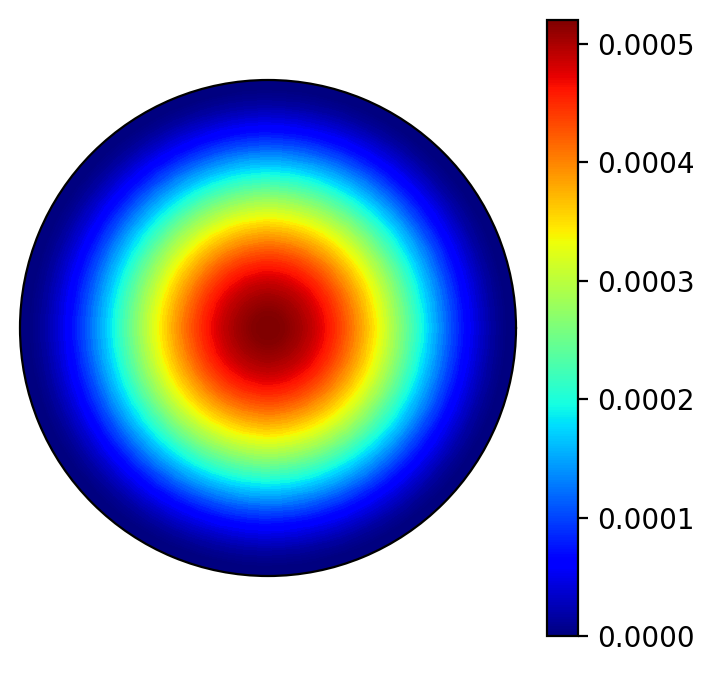

0.00052


In [ ]:
fig = plt.figure(figsize=(4, 4), dpi=200)
ax = Axes3D(fig)
ax.set_title('With masked values')
rad = np.linspace(0, a, 100)
azm = np.linspace(0, 2 * np.pi, 100)
r, th = np.meshgrid(rad, azm)
z = w(r, D)

plt.subplot(projection="polar")

cs = plt.pcolormesh(th, r, z, cmap='jet')

plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

plt.grid()
cbar = fig.colorbar(cs)

plt.show()

print(w(0,D))

#Розв'язок за допомогою PINN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
class PINN(nn.Module):
    def __init__(self):
        super(PINN,self).__init__()
        # def init_weights(m):
        #     if isinstance(m, nn.Linear):
        #         nn.init.xavier_normal(m.weight)
        #         m.bias.data.fill_(0.01)
        self.net = nn.Sequential(
            nn.Linear(1,64),
            nn.Tanh(),
            # nn.Linear(8,8),
            # nn.Tanh(),
            # nn.Linear(8,8),
            # nn.Tanh(),
            # nn.Linear(8,8),
            # nn.Tanh(),
            # nn.Linear(8,8),
            # nn.Tanh(),
            # nn.Linear(8,8),
            # nn.Tanh(),
            # nn.Linear(8,8),
            # nn.Tanh(),
            # nn.Linear(8,8),
            # # nn.Tanh(),
            # # nn.Linear(8,8),

            # nn.ReLU(),

            nn.Linear(64,1)
        )

        # self.apply(init_weights)
        self.double()
    def forward(self,x):
        return self.net(x)

In [ ]:
x = torch.rand(10, 1, requires_grad = True)
x

tensor([[0.4560],
        [0.9751],
        [0.7117],
        [0.9956],
        [0.1241],
        [0.2412],
        [0.5072],
        [0.0031],
        [0.1801],
        [0.1977]], requires_grad=True)

In [ ]:
x = (0 - 2)*torch.rand(10, 1, requires_grad = True) + 2 + 0.000000000001
x

tensor([[0.4897],
        [1.5514],
        [0.9784],
        [1.3620],
        [0.4880],
        [0.0671],
        [0.9916],
        [0.1336],
        [0.5286],
        [1.6439]], grad_fn=<AddBackward0>)

In [ ]:
def initial_condition():
    return torch.tensor([0])

def boundary_condition():
    return torch.tensor([0])

In [ ]:
def generate_training_data(num_points, R):
    # x = torch.rand(num_points, 1, requires_grad = True)

    # x = (0 - R)*torch.rand(num_points, 1, requires_grad = True) + R + 0.001

    x_vals = torch.linspace(0, R, num_points, requires_grad = True)
    x = torch.stack([x_vals.double()], dim=1)

    return x

In [ ]:
tmp = torch.tensor([0.4])
tmp.view(-1,1)

tensor([[0.4000]])

In [ ]:
def generate_boundary_points(b_point):
    x_boundary = torch.tensor([b_point],  requires_grad = True)


    return x_boundary.view(-1,1)


def generate_boundary_training_data(b_point):
    x_boundary = generate_boundary_points(b_point)


    return x_boundary

$- 37.141031926431 q - 29.0310213411079 \frac{d}{d r} w{\left(r \right)} \left(\frac{d^{2}}{d r^{2}} w{\left(r \right)}\right)^{2} \frac{d^{4}}{d r^{4}} w{\left(r \right)} + 1.42857142857143 \frac{d}{d r} w{\left(r \right)} \frac{d^{4}}{d r^{4}} w{\left(r \right)} - 58.0620426822158 \left(\frac{d^{2}}{d r^{2}} w{\left(r \right)}\right)^{2} \frac{d^{4}}{d r^{4}} w{\left(r \right)} - 174.186128046647 \frac{d^{2}}{d r^{2}} w{\left(r \right)} \left(\frac{d^{3}}{d r^{3}} w{\left(r \right)}\right)^{2} - \frac{4.04229411078717 \left(\frac{d}{d r} w{\left(r \right)}\right)^{2} \frac{d^{2}}{d r^{2}} w{\left(r \right)} \frac{d^{4}}{d r^{4}} w{\left(r \right)}}{r} - \frac{58.0620426822158 \frac{d}{d r} w{\left(r \right)} \left(\frac{d^{2}}{d r^{2}} w{\left(r \right)}\right)^{2} \frac{d^{3}}{d r^{3}} w{\left(r \right)}}{r} - \frac{8.08458822157434 \frac{d}{d r} w{\left(r \right)} \frac{d^{2}}{d r^{2}} w{\left(r \right)} \frac{d^{4}}{d r^{4}} w{\left(r \right)}}{r} - \frac{12.1268823323615 \frac{d}{d r} w{\left(r \right)} \left(\frac{d^{3}}{d r^{3}} w{\left(r \right)}\right)^{2}}{r} + \frac{2.85714285714286 \frac{d}{d r} w{\left(r \right)} \frac{d^{3}}{d r^{3}} w{\left(r \right)}}{r} - \frac{140.377850029155 \left(\frac{d^{2}}{d r^{2}} w{\left(r \right)}\right)^{2} \frac{d^{3}}{d r^{3}} w{\left(r \right)}}{r} - \frac{29.0310213411079 \left(\frac{d}{d r} w{\left(r \right)}\right)^{3} \frac{d^{4}}{d r^{4}} w{\left(r \right)}}{r^{2}} - \frac{8.08458822157434 \left(\frac{d}{d r} w{\left(r \right)}\right)^{2} \frac{d^{2}}{d r^{2}} w{\left(r \right)} \frac{d^{3}}{d r^{3}} w{\left(r \right)}}{r^{2}} - \frac{0.281425539358601 \left(\frac{d}{d r} w{\left(r \right)}\right)^{2} \frac{d^{4}}{d r^{4}} w{\left(r \right)}}{r^{2}} + \frac{29.0310213411079 \frac{d}{d r} w{\left(r \right)} \left(\frac{d^{2}}{d r^{2}} w{\left(r \right)}\right)^{3}}{r^{2}} - \frac{109.165199300292 \frac{d}{d r} w{\left(r \right)} \frac{d^{2}}{d r^{2}} w{\left(r \right)} \frac{d^{3}}{d r^{3}} w{\left(r \right)}}{r^{2}} - \frac{1.42857142857143 \frac{d}{d r} w{\left(r \right)} \frac{d^{2}}{d r^{2}} w{\left(r \right)}}{r^{2}} - \frac{58.3434682215743 \left(\frac{d^{2}}{d r^{2}} w{\left(r \right)}\right)^{3}}{r^{2}} - \frac{58.0620426822158 \left(\frac{d}{d r} w{\left(r \right)}\right)^{3} \frac{d^{3}}{d r^{3}} w{\left(r \right)}}{r^{3}} - \frac{24.9887272303207 \left(\frac{d}{d r} w{\left(r \right)}\right)^{2} \left(\frac{d^{2}}{d r^{2}} w{\left(r \right)}\right)^{2}}{r^{3}} + \frac{116.686936443149 \left(\frac{d}{d r} w{\left(r \right)}\right)^{2} \frac{d^{3}}{d r^{3}} w{\left(r \right)}}{r^{3}} + \frac{1.42857142857143 \left(\frac{d}{d r} w{\left(r \right)}\right)^{2}}{r^{3}} + \frac{112.92606787172 \frac{d}{d r} w{\left(r \right)} \left(\frac{d^{2}}{d r^{2}} w{\left(r \right)}\right)^{2}}{r^{3}} + \frac{24.9887272303207 \left(\frac{d}{d r} w{\left(r \right)}\right)^{3} \frac{d^{2}}{d r^{2}} w{\left(r \right)}}{r^{4}} + \frac{15.6063253644315 \left(\frac{d}{d r} w{\left(r \right)}\right)^{2} \frac{d^{2}}{d r^{2}} w{\left(r \right)}}{r^{4}} - \frac{29.0310213411079 \left(\frac{d}{d r} w{\left(r \right)}\right)^{4}}{r^{5}} - \frac{70.1889250145773 \left(\frac{d}{d r} w{\left(r \right)}\right)^{3}}{r^{5}}$

-37.141031926431*q*(x**5) - 29.0310213411079*u_x*(u_xx*u_xx)*u_xxxx*(x**5) + 1.42857142857143*u_x*u_xxxx*(x**5) - 58.0620426822158*(u_xx*u_xx)*u_xxxx*(x**5) - 174.186128046647*u_xx*(u_xxx*u_xxx) - 4.04229411078717*u_x*u_x**u_xx*u_xxxx*(x**4) - 58.0620426822158*u_x*u_xx*u_xx*w_xxx*(x**4) - 8.08458822157434*u_x*u_xx*u_xxxx*(x**4) - 12.1268823323615*u_x*u_xxx*u_xxx*(x**4) + 2.85714285714286*u_x*u_xxx*(x**4) - 140.377850029155*u_xx*u_xx*u_xxx*(x**4) - 29.0310213411079*u_x*u_x*u_x*u_xxxx*(x**3) - 8.08458822157434*u_x*u_x*u_xx*u_xxx*(x**3) - 0.281425539358601*u_x*u_x*u_xxxx*(x**3) + 29.0310213411079*u_x*u_xx*u_xx*u_xx*(x**3) - 109.165199300292*u_x*u_xx*u_xxx*(x**3) - 1.42857142857143*u_x*u_xx*(x**3) - 58.3434682215743*u_xx*u_xx*u_xx*(x**3) - 58.0620426822158*u_x*u_x*u_x*u_xxx*(x**2) - 24.9887272303207*u_x*u_x*u_xx*u_xx*(x**2) + 116.686936443149*u_x*u_x*u_xxx*(x**2) + 1.42857142857143*u_x*u_x*(x**2) + 112.92606787172*u_x*u_xx*u_xx*(x**2) + 24.9887272303207*u_x*u_x*u_x*u_xx*(x) + 15.6063253644315*u_x*u_x*u_xx*(x) - 29.0310213411079*u_x*u_x*u_x*u_x - 70.1889250145773*u_x*u_x*u_x


    eq_residual = - 29.03*u_x*(u_xx*u_xx)*u_xxxx*(x*x*x*x*x) + \
    1.43*u_x*u_xxxx*(x*x*x*x*x) - 58.06*(u_xx*u_xx)*u_xxxx*(x*x*x*x*x) - \
    174.19*u_xx*(u_xxx*u_xxx) - 4.04*u_x*u_x**u_xx*u_xxxx*(x*x*x*x) - \
    58.06*u_x*u_xx*u_xx*u_xxx*(x*x*x*x) - 8.08*u_x*u_xx*u_xxxx*(x*x*x*x) - \
    12.13*u_x*u_xxx*u_xxx*(x*x*x*x) + 2.86*u_x*u_xxx*(x*x*x*x) - \
    140.38*u_xx*u_xx*u_xxx*(x*x*x*x) - 29.03*u_x*u_x*u_x*u_xxxx*(x*x*x) - \
    8.08*u_x*u_x*u_xx*u_xxx*(x*x*x) - 0.28*u_x*u_x*u_xxxx*(x*x*x) + \
    29.03*u_x*u_xx*u_xx*u_xx*(x*x*x) - 109.16*u_x*u_xx*u_xxx*(x*x*x) - \
    1.43*u_x*u_xx*(x*x*x) - 58.34*u_xx*u_xx*u_xx*(x*x*x) - \
    58.06*u_x*u_x*u_x*u_xxx*(x*x) - 24.99*u_x*u_x*u_xx*u_xx*(x*x) + \
    116.69*u_x*u_x*u_xxx*(x*x) + 1.43*u_x*u_x*(x*x) + \
    112.93*u_x*u_xx*u_xx*(x*x) + 24.99*u_x*u_x*u_x*u_xx*(x) + \
    15.61*u_x*u_x*u_xx*(x) - 29.03*u_x*u_x*u_x*u_x - 70.19*u_x*u_x*u_x


In [ ]:
def pde(x, model, q, D):

    x = x.double()

    # print('*********************************************************')
    # print(x.size())
    # print(x.dtype)
    # print(x)

    input_data = x

    # print('*********************************************************')
    # print(input_data.size())
    # print(input_data.dtype)

    u = model(input_data)
    u_x = torch.autograd.grad(u, x, grad_outputs= torch.ones_like(u), create_graph= True, retain_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs= torch.ones_like(u_x), create_graph= True, retain_graph=True)[0]
    u_xxx = torch.autograd.grad(u_xx, x, grad_outputs= torch.ones_like(u_xx), create_graph= True, retain_graph=True)[0]
    u_xxxx = torch.autograd.grad(u_xxx, x, grad_outputs= torch.ones_like(u_xxx), create_graph= True, retain_graph=True)[0]
    # print('*********************************************************')
    # print(u_x.size())
    # print(u_x.dtype)
    # print('*********************************************************')
    # print(u.size())
    # print(u.dtype)
    # print('*********************************************************')
    # print(x.size())
    # print(x.dtype)

    residual_r = torch.tensor([q/D]).double()

    # eq_residual = (10**3)*(- 29.03*u_x*(u_xx*u_xx)*u_xxxx*(x*x*x*x*x))


    # eq_residual =  (- 29.03*u_x*(u_xx*u_xx)*u_xxxx*(x*x*x*x*x)*(10**15) + \
    # 1.43*u_x*u_xxxx*(x*x*x*x*x)*(10**15) - 58.06*(u_xx*u_xx)*u_xxxx*(x*x*x*x*x)*(10**15) - \
    # 174.19*u_xx*(u_xxx*u_xxx)*(10**15) - 4.04*u_x*u_x**u_xx*u_xxxx*(x*x*x*x)*(10**15) - \
    # 58.06*u_x*u_xx*u_xx*u_xxx*(x*x*x*x)*(10**15) - 8.08*u_x*u_xx*u_xxxx*(x*x*x*x)*(10**15) - \
    # 12.13*u_x*u_xxx*u_xxx*(x*x*x*x)*(10**15) + 2.86*u_x*u_xxx*(x*x*x*x)*(10**15) - \
    # 140.38*u_xx*u_xx*u_xxx*(x*x*x*x)*(10**15) - 29.03*u_x*u_x*u_x*u_xxxx*(x*x*x)*(10**15) - \
    # 8.08*u_x*u_x*u_xx*u_xxx*(x*x*x)*(10**15) - 0.28*u_x*u_x*u_xxxx*(x*x*x)*(10**15) + \
    # 29.03*u_x*u_xx*u_xx*u_xx*(x*x*x)*(10**15) - 109.16*u_x*u_xx*u_xxx*(x*x*x)*(10**15) - \
    # 1.43*u_x*u_xx*(x*x*x)*(10**15) - 58.34*u_xx*u_xx*u_xx*(x*x*x)*(10**15) - \
    # 58.06*u_x*u_x*u_x*u_xxx*(x*x)*(10**15) - 24.99*u_x*u_x*u_xx*u_xx*(x*x)*(10**15) + \
    # 116.69*u_x*u_x*u_xxx*(x*x)*(10**15) + 1.43*u_x*u_x*(x*x)*(10**15) + \
    # 112.93*u_x*u_xx*u_xx*(x*x)*(10**15) + 24.99*u_x*u_x*u_x*u_xx*(x)*(10**15) + \
    # 15.61*u_x*u_x*u_xx*(x)*(10**15) - 29.03*u_x*u_x*u_x*u_x*(10**15) - 70.19*u_x*u_x*u_x*(10**15))

    k = 10**4

    # eq_residual =  (1.43*u_x*u_xxxx*(x*x*x*x*x)*k - \
    # 1.43*u_x*u_xx*(x*x*x)*k + 1.43*u_x*u_x*(x*x)*k)

    eq_residual =  (- 29.03*u_x*(u_xx*u_xx)*u_xxxx*(x*x*x*x*x)*(k) + \
    1.43*u_x*u_xxxx*(x*x*x*x*x)*(k) - 58.06*(u_xx*u_xx)*u_xxxx*(x*x*x*x*x)*(k) - \
    174.19*u_xx*(u_xxx*u_xxx)*(k) - 4.04*u_x*u_x**u_xx*u_xxxx*(x*x*x*x)*(k) - \
    58.06*u_x*u_xx*u_xx*u_xxx*(x*x*x*x)*(k) - 8.08*u_x*u_xx*u_xxxx*(x*x*x*x)*(k) - \
    12.13*u_x*u_xxx*u_xxx*(x*x*x*x)*(k) + 2.86*u_x*u_xxx*(x*x*x*x)*(k) - \
    140.38*u_xx*u_xx*u_xxx*(x*x*x*x)*(k) - 29.03*u_x*u_x*u_x*u_xxxx*(x*x*x)*(k) - \
    8.08*u_x*u_x*u_xx*u_xxx*(x*x*x)*(k) - 0.28*u_x*u_x*u_xxxx*(x*x*x)*(k) + \
    29.03*u_x*u_xx*u_xx*u_xx*(x*x*x)*(k) - 109.16*u_x*u_xx*u_xxx*(x*x*x)*(k) - \
    1.43*u_x*u_xx*(x*x*x)*(k) - 58.34*u_xx*u_xx*u_xx*(x*x*x)*(k) - \
    58.06*u_x*u_x*u_x*u_xxx*(x*x)*(k) - 24.99*u_x*u_x*u_xx*u_xx*(x*x)*(k) + \
    116.69*u_x*u_x*u_xxx*(x*x)*(k) + 1.43*u_x*u_x*(x*x)*(k) + \
    112.93*u_x*u_xx*u_xx*(x*x)*(k) + 24.99*u_x*u_x*u_x*u_xx*(x)*(k) + \
    15.61*u_x*u_x*u_xx*(x)*(k) - 29.03*u_x*u_x*u_x*u_x*(k) - 70.19*u_x*u_x*u_x*(k))


    return eq_residual

In [ ]:
def train_PINN(model, num_iterations, num_points, q, R, D):


    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    # optimizer = optim.SGD(model.parameters(), lr=1e-3)
    # optimizer = optim.LBFGS(model.parameters())
    # breakpoint()
    for  iteration in range(num_iterations):
        optimizer.zero_grad()

        # breakpoint()

        x = generate_training_data(num_points, R)

        # print('generate_training_data')
        # print(x)
        # breakpoint()

        x_b = generate_boundary_training_data(R)

        # print('generate_boundary_training_data')
        # print(x_b)
        # breakpoint()

        x_initial = torch.tensor([0.0],  requires_grad = True)
        x_initial = x_initial.view(-1,1)
        x_initial = x_initial.double()

        # print('x_initial')
        # print(x_initial)
        # breakpoint()

        u_initial_x = initial_condition()
        u_initial_x = u_initial_x.double()

        # print('u_initial_x')
        # print(u_initial_x)
        # breakpoint()

        u_boundary_x = boundary_condition()

        # print('boundary_condition')
        # print(u_boundary_x)
        # breakpoint()

        residual = pde(x, model, q, D)

        # print('residual')
        # print(residual)
        # breakpoint()

        u_boundary_x = u_boundary_x.double()
        x_b = x_b.double()



        ub = model(x_b)
        ui = model(x_initial)

        # print(ub)
        # breakpoint()

        ub_x = torch.autograd.grad(ub, x_b, grad_outputs= torch.ones_like(ub), create_graph= True, retain_graph=True)[0]
        ui_x = torch.autograd.grad(ui, x_initial, grad_outputs= torch.ones_like(ui), create_graph= True, retain_graph=True)[0]

        # print('ub_x')
        # print(ub_x)

        # print('ui_x')
        # print(ui_x)

        # breakpoint()


        residual_r = torch.tensor([37.141031926431*q]).double()*(x*x*x*x*x)

        # print('residual_r')
        # print(residual_r)
        # breakpoint()

        # loss =  nn.MSELoss()(u_boundary_x, ub) + \
        #         nn.MSELoss()(u_boundary_x, ub_x) + \
        #         nn.MSELoss()(u_initial_x, ui_x) + \
        #         nn.MSELoss()(residual, torch.zeros_like(residual))

        loss =  nn.MSELoss()(u_boundary_x, ub) + \
                nn.MSELoss()(u_boundary_x, ub_x) + \
                nn.MSELoss()(u_initial_x, ui_x) + \
                nn.MSELoss()(residual, (10**4)*residual_r)

        # l1_regularization, l2_regularization = torch.tensor(0.0), torch.tensor(0.0)
        # for param in model.parameters():
        #     l1_regularization += torch.norm(param, 1)**2
        #     l2_regularization += torch.norm(param, 2)**2

        # loss = loss + l1_regularization + l2_regularization

        # print(loss.dtype)


        # breakpoint()

        loss.backward()

        # breakpoint()

        optimizer.step()

        # breakpoint()

        if iteration % 100 == 0:
            print("itration", iteration, "loss", loss )

In [ ]:
a

0.4

In [ ]:
model = PINN()
num_iterations = 50000
num_points = 100
train_PINN(model, num_iterations, num_points, q, a, D)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


itration 0 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 100 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 200 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 300 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 400 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 500 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 600 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 700 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 800 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 900 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 1000 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 1100 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 1200 loss tensor(nan, dtype=torch.float64, grad_fn=<AddBackward0>)
itration 1300 loss tenso

In [ ]:
with torch.no_grad():
    x_vals = torch.linspace(0, a-0.00000001, 50)


    input_data = torch.stack([x_vals.double()], dim=1)
    solution = model(input_data)
    sol = torch.stack([x_vals, solution.flatten()], dim=1)

    print(sol)



tensor([[0.0000,    nan],
        [0.0082,    nan],
        [0.0163,    nan],
        [0.0245,    nan],
        [0.0327,    nan],
        [0.0408,    nan],
        [0.0490,    nan],
        [0.0571,    nan],
        [0.0653,    nan],
        [0.0735,    nan],
        [0.0816,    nan],
        [0.0898,    nan],
        [0.0980,    nan],
        [0.1061,    nan],
        [0.1143,    nan],
        [0.1224,    nan],
        [0.1306,    nan],
        [0.1388,    nan],
        [0.1469,    nan],
        [0.1551,    nan],
        [0.1633,    nan],
        [0.1714,    nan],
        [0.1796,    nan],
        [0.1878,    nan],
        [0.1959,    nan],
        [0.2041,    nan],
        [0.2122,    nan],
        [0.2204,    nan],
        [0.2286,    nan],
        [0.2367,    nan],
        [0.2449,    nan],
        [0.2531,    nan],
        [0.2612,    nan],
        [0.2694,    nan],
        [0.2776,    nan],
        [0.2857,    nan],
        [0.2939,    nan],
        [0.3020,    nan],
        [0.3

In [ ]:
sol_np = sol.numpy()
np.shape(sol_np)
points = sol_np[:, 0]
points

array([0.        , 0.00816326, 0.01632653, 0.02448979, 0.03265306,
       0.04081633, 0.04897959, 0.05714285, 0.06530612, 0.07346939,
       0.08163265, 0.08979592, 0.09795918, 0.10612244, 0.11428571,
       0.12244897, 0.13061224, 0.1387755 , 0.14693877, 0.15510203,
       0.1632653 , 0.17142856, 0.17959183, 0.18775509, 0.19591835,
       0.20408162, 0.21224488, 0.22040814, 0.22857141, 0.23673467,
       0.24489795, 0.25306121, 0.26122448, 0.26938772, 0.277551  ,
       0.28571427, 0.29387754, 0.30204079, 0.31020406, 0.31836733,
       0.32653061, 0.33469385, 0.34285712, 0.3510204 , 0.35918364,
       0.36734691, 0.37551019, 0.38367346, 0.3918367 , 0.39999998])

In [ ]:
pred_y = []
true_y = []
pred_y = sol_np[:, 1]
for x in points:
    true_y.append(w(x, D))

print(true_y)

[0.00052, 0.00052, 0.000518, 0.000516, 0.000513, 0.000509, 0.000504, 0.000499, 0.000493, 0.000485, 0.000478, 0.000469, 0.000459, 0.000449, 0.000439, 0.000427, 0.000415, 0.000402, 0.000389, 0.000375, 0.000361, 0.000347, 0.000331, 0.000316, 0.0003, 0.000285, 0.000268, 0.000252, 0.000236, 0.00022, 0.000203, 0.000187, 0.000171, 0.000155, 0.00014, 0.000125, 0.00011, 9.6e-05, 8.3e-05, 7e-05, 5.8e-05, 4.7e-05, 3.7e-05, 2.7e-05, 2e-05, 1.3e-05, 7e-06, 3e-06, 1e-06, 0.0]


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot

def plot_feature(true_y, pred_y, points):

    fig_prices = go.Figure()
    fig_prices.add_trace(go.Scatter(x=points, y=true_y,
                        # fill= 'tonexty',
                        mode='lines',
                        # line_color='indigo',
                        name="Точний розв'язок"))
    fig_prices.add_trace(go.Scatter(
                        x=points,
                        y=pred_y,
                        # fill='tonexty', # fill area between trace0 and trace1
                        mode='lines',
                        # line_color='red',
                        name="Наближений розв'язок"))


    fig_prices.update_layout(yaxis_title="Значення функції")
    fig_prices.update_layout(
    xaxis=dict(
        title='Точки колокації',
        title_font=dict(size=20),  # Збільшення розміру шрифту підпису осі X
        tickfont=dict(size=16),    # Збільшення розміру шрифту тікерів
    ),
    yaxis=dict(
        title='Значення функції',
        title_font=dict(size=20),  # Збільшення розміру шрифту підпису осі Y
        tickfont=dict(size=16),    # Збільшення розміру шрифту тікерів
    ),
    legend=dict(
        font=dict(size=18)          # Збільшення розміру шрифту легенди
    )
)
    fig_prices.show()

    return 0

In [ ]:
plot_feature(true_y, pred_y, points)

0

In [ ]:
import pandas as pd
import numpy as np

# Об'єднання масивів в DataFrame та назви стовпців
df = pd.DataFrame({'True': true_y, 'Pred': np.round(pred_y, 6)})

# Вивід DataFrame
print(df)

        True  Pred
0   0.000520   NaN
1   0.000520   NaN
2   0.000518   NaN
3   0.000516   NaN
4   0.000513   NaN
5   0.000509   NaN
6   0.000504   NaN
7   0.000499   NaN
8   0.000493   NaN
9   0.000485   NaN
10  0.000478   NaN
11  0.000469   NaN
12  0.000459   NaN
13  0.000449   NaN
14  0.000439   NaN
15  0.000427   NaN
16  0.000415   NaN
17  0.000402   NaN
18  0.000389   NaN
19  0.000375   NaN
20  0.000361   NaN
21  0.000347   NaN
22  0.000331   NaN
23  0.000316   NaN
24  0.000300   NaN
25  0.000285   NaN
26  0.000268   NaN
27  0.000252   NaN
28  0.000236   NaN
29  0.000220   NaN
30  0.000203   NaN
31  0.000187   NaN
32  0.000171   NaN
33  0.000155   NaN
34  0.000140   NaN
35  0.000125   NaN
36  0.000110   NaN
37  0.000096   NaN
38  0.000083   NaN
39  0.000070   NaN
40  0.000058   NaN
41  0.000047   NaN
42  0.000037   NaN
43  0.000027   NaN
44  0.000020   NaN
45  0.000013   NaN
46  0.000007   NaN
47  0.000003   NaN
48  0.000001   NaN
49  0.000000   NaN


In [ ]:
np.round(pred_y, 6)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error([true_y[0]], [pred_y[0]])

ValueError: Input contains NaN.

In [ ]:
pred_y

In [ ]:
len(points)

In [ ]:
len(pred_y)

In [ ]:
np.shape(z)

In [ ]:
def transform_to_matrix(input_array):
    n = len(input_array)
    reshaped_matrix = np.array([np.repeat(value, n) for value in input_array])
    return reshaped_matrix

z = pred_y
result_matrix = transform_to_matrix(z)

print("Оригінальний масив:", z)
print("Масив розмірності (n, n) з векторами та повторюваними значеннями:", result_matrix)


In [ ]:
fig = plt.figure(figsize=(4, 4), dpi=200)
ax = Axes3D(fig)
ax.set_title('With masked values')
rad = points
azm = np.linspace(0, 2 * np.pi, len(points))
r, th = np.meshgrid(rad, azm)
z = result_matrix

plt.subplot(projection="polar")

cs = plt.pcolormesh(th, r, z, cmap='jet')

plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

plt.grid()
cbar = fig.colorbar(cs)

plt.show()


In [ ]:
import numpy as np

def transform_to_matrix(input_array):
    """
    Функція, що перетворює одновимірний масив в масив розмірності (n, n) з повторюваними значеннями.

    Параметри:
    - input_array: Одновимірний масив розмірності n.

    Повертає:
    - Масив розмірності (n, n) з повторюваними значеннями.
    """
    n = len(input_array)
    reshaped_matrix = np.array([input_array] * n)
    return reshaped_matrix

# Приклад використання
original_array = [1, 2, 3, 4, 5]
result_matrix = transform_to_matrix(original_array)

print("Оригінальний масив:", original_array)
print("Масив розмірності (n, n) з повторюваними значеннями:", result_matrix)


In [ ]:
import numpy as np

def transform_to_matrix(input_array):
    """
    Функція, що перетворює одновимірний масив в масив розмірності (n, n),
    де на кожній позиції старого масива записано вектор з повторюваним значенням відповідного значення початкового масиву.

    Параметри:
    - input_array: Одновимірний масив розмірності n.

    Повертає:
    - Масив розмірності (n, n) з векторами, де значення векторів повторюються відповідно до значень вхідного масиву.
    """
    n = len(input_array)
    reshaped_matrix = np.array([np.repeat(value, n) for value in input_array])
    return reshaped_matrix

# Приклад використання
original_array = [1, 2, 3, 4, 5]
result_matrix = transform_to_matrix(original_array)

print("Оригінальний масив:", original_array)
print("Масив розмірності (n, n) з векторами та повторюваними значеннями:", result_matrix)
